In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd. set_option('display.max_columns', 300)
pd. set_option('display.max_rows', 300)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving H2HBABBA2793.csv to H2HBABBA2793.csv


In [ ]:
df = pd.read_csv('H2HBABBA2793.csv')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200186937,SYSC llc,22-01-2019 00:00,2019,1928564442,03-01-2019,20190103,20190103,20190118,USD,RV,1,NaN,5020.64,20190103,NAA8,1.928564e+09,0
1,U001,200769623,WAL-MAR in,28-08-2019 00:00,2019,1929732150,11-08-2019,20190810,20190811,20190826,USD,RV,1,NaN,7684.78,20190811,NAH4,1.929732e+09,0
2,U001,200769623,WAL-MAR llc,09-07-2019 00:00,2019,1929553996,29-06-2019,20190628,20190629,20190714,USD,RV,1,NaN,12320.17,20190629,NAH4,1.929554e+09,0
3,U001,200416837,DEC llc,02-12-2019 00:00,2019,1930183649,22-11-2019,20191122,20191122,20191209,USD,RV,1,NaN,196.08,20191116,NAM4,1.930184e+09,0
4,U001,200769623,WAL-MAR us,18-02-2020 00:00,2020,1930459207,30-01-2020,20200130,20200130,20200214,USD,RV,1,NaN,51605.46,20200130,NAH4,1.930459e+09,0


In [ ]:
df.shape

(50000, 19)

In [ ]:
df.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,200769623,WAL-MAR systems,03-09-2019 00:00,2019,1929771735,22-08-2019,20190821,20190822,20190906,USD,RV,1,NaN,8949.70,20190822,NAH4,1.929772e+09,0
49996,U001,200769623,WAL-MAR llc,NaN,2020,1930739025,04-04-2020,20200403,20200404,20200419,USD,RV,1,NaN,15524.31,20200404,NAH4,1.930739e+09,1
49997,CA02,140104472,MARTIN corporation,30-10-2019 00:00,2019,2960584672,06-10-2019,20191007,20191006,20191025,CAD,RV,1,NaN,5981.76,20191015,CA10,2.960585e+09,0
49998,U001,200763814,SYSCO F trust,22-04-2019 00:00,2019,1929089180,04-04-2019,20190405,20190404,20190419,USD,RV,1,NaN,31876.59,20190404,NAA8,1.929089e+09,0
49999,U001,200762301,C&S WH us,NaN,2020,1930661109,18-03-2020,20200317,20200318,20200402,USD,RV,1,NaN,92927.18,20200318,NAC6,1.930661e+09,1


In [ ]:
df.drop(['business_code','buisness_year','doc_id','cust_payment_terms','area_business','document_create_date.1','document type','baseline_create_date','posting_id'],axis=1,inplace=True)
df.head()

,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,invoice_id,isOpen
0,200186937,SYSC llc,22-01-2019 00:00,03-01-2019,20190103,20190118,USD,5020.64,1.928564e+09,0
1,200769623,WAL-MAR in,28-08-2019 00:00,11-08-2019,20190810,20190826,USD,7684.78,1.929732e+09,0
2,200769623,WAL-MAR llc,09-07-2019 00:00,29-06-2019,20190628,20190714,USD,12320.17,1.929554e+09,0
3,200416837,DEC llc,02-12-2019 00:00,22-11-2019,20191122,20191209,USD,196.08,1.930184e+09,0
4,200769623,WAL-MAR us,18-02-2020 00:00,30-01-2020,20200130,20200214,USD,51605.46,1.930459e+09,0


In [ ]:
df.isnull().sum()

cust_number                 0
name_customer               0
clear_date              10000
posting_date                0
document_create_date        0
due_in_date                 0
invoice_currency            0
total_open_amount           0
invoice_id                  4
isOpen                      0
dtype: int64

In [ ]:
df[df['invoice_id'].isnull()]

,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,invoice_id,isOpen
10069,140104409,LOB,08-05-2019 00:00,29-03-2019,20190329,20190215,CAD,2635.2,NaN,0
11529,100054173,DIA corporation,31-05-2019 00:00,29-03-2019,20190329,20190121,CAD,2040.0,NaN,0
23237,100054173,DIA corporation,14-05-2019 00:00,29-03-2019,20190329,20190113,CAD,3900.0,NaN,0
31835,100054351,UNF corp,02-05-2019 00:00,29-03-2019,20190329,20190324,CAD,5964.0,NaN,0


In [ ]:
#for dropping the null rows using invoice id
df.drop([10069,11529,23237,31835],axis=0,inplace=True)
df.shape

(49996, 10)

In [ ]:
df.drop_duplicates(keep="first",inplace=True)
df

,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,invoice_id,isOpen
0,200186937,SYSC llc,22-01-2019 00:00,03-01-2019,20190103,20190118,USD,5020.64,1.928564e+09,0
1,200769623,WAL-MAR in,28-08-2019 00:00,11-08-2019,20190810,20190826,USD,7684.78,1.929732e+09,0
2,200769623,WAL-MAR llc,09-07-2019 00:00,29-06-2019,20190628,20190714,USD,12320.17,1.929554e+09,0
3,200416837,DEC llc,02-12-2019 00:00,22-11-2019,20191122,20191209,USD,196.08,1.930184e+09,0
4,200769623,WAL-MAR us,18-02-2020 00:00,30-01-2020,20200130,20200214,USD,51605.46,1.930459e+09,0
...,...,...,...,...,...,...,...,...,...,...
49995,200769623,WAL-MAR systems,03-09-2019 00:00,22-08-2019,20190821,20190906,USD,8949.70,1.929772e+09,0
49996,200769623,WAL-MAR llc,NaN,04-04-2020,20200403,20200419,USD,15524.31,1.930739e+09,1
49997,140104472,MARTIN corporation,30-10-2019 00:00,06-10-2019,20191007,20191025,CAD,5981.76,2.960585e+09,0
49998,200763814,SYSCO F trust,22-04-2019 00:00,04-04-2019,20190405,20190419,USD,31876.59,1.929089e+09,0


In [ ]:
df.isnull().sum()

cust_number                0
name_customer              0
clear_date              9685
posting_date               0
document_create_date       0
due_in_date                0
invoice_currency           0
total_open_amount          0
invoice_id                 0
isOpen                     0
dtype: int64

In [ ]:
df['clear_date']=pd.to_datetime(df.clear_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48830 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           48830 non-null  object        
 1   name_customer         48830 non-null  object        
 2   clear_date            39145 non-null  datetime64[ns]
 3   posting_date          48830 non-null  object        
 4   document_create_date  48830 non-null  int64         
 5   due_in_date           48830 non-null  int64         
 6   invoice_currency      48830 non-null  object        
 7   total_open_amount     48830 non-null  float64       
 8   invoice_id            48830 non-null  float64       
 9   isOpen                48830 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.1+ MB


In [ ]:
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df.head()

,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,invoice_id,isOpen
0,200186937,SYSC llc,2019-01-22,03-01-2019,20190103,2019-01-18,USD,5020.64,1.928564e+09,0
1,200769623,WAL-MAR in,2019-08-28,11-08-2019,20190810,2019-08-26,USD,7684.78,1.929732e+09,0
2,200769623,WAL-MAR llc,2019-09-07,29-06-2019,20190628,2019-07-14,USD,12320.17,1.929554e+09,0
3,200416837,DEC llc,2019-02-12,22-11-2019,20191122,2019-12-09,USD,196.08,1.930184e+09,0
4,200769623,WAL-MAR us,2020-02-18,30-01-2020,20200130,2020-02-14,USD,51605.46,1.930459e+09,0


In [ ]:
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df.head()

,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,invoice_id,isOpen
0,200186937,SYSC llc,2019-01-22,03-01-2019,2019-01-03,2019-01-18,USD,5020.64,1.928564e+09,0
1,200769623,WAL-MAR in,2019-08-28,11-08-2019,2019-08-10,2019-08-26,USD,7684.78,1.929732e+09,0
2,200769623,WAL-MAR llc,2019-09-07,29-06-2019,2019-06-28,2019-07-14,USD,12320.17,1.929554e+09,0
3,200416837,DEC llc,2019-02-12,22-11-2019,2019-11-22,2019-12-09,USD,196.08,1.930184e+09,0
4,200769623,WAL-MAR us,2020-02-18,30-01-2020,2020-01-30,2020-02-14,USD,51605.46,1.930459e+09,0


In [ ]:
df['posting_date']=pd.to_datetime(df.posting_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48830 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           48830 non-null  object        
 1   name_customer         48830 non-null  object        
 2   clear_date            39145 non-null  datetime64[ns]
 3   posting_date          48830 non-null  datetime64[ns]
 4   document_create_date  48830 non-null  datetime64[ns]
 5   due_in_date           48830 non-null  datetime64[ns]
 6   invoice_currency      48830 non-null  object        
 7   total_open_amount     48830 non-null  float64       
 8   invoice_id            48830 non-null  float64       
 9   isOpen                48830 non-null  int64         
dtypes: datetime64[ns](4), float64(2), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
main_train = df[df.clear_date.isnull() == False]
main_test = df[df.clear_date.isnull() == True]

In [ ]:
main_train.shape, main_test.shape

((39145, 10), (9685, 10))

In [ ]:
main_train['Delay'] = main_train['clear_date'] - main_train['due_in_date']
main_train.head()

,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,invoice_id,isOpen,Delay
0,200186937,SYSC llc,2019-01-22,2019-03-01,2019-01-03,2019-01-18,USD,5020.64,1.928564e+09,0,4 days
1,200769623,WAL-MAR in,2019-08-28,2019-11-08,2019-08-10,2019-08-26,USD,7684.78,1.929732e+09,0,2 days
2,200769623,WAL-MAR llc,2019-09-07,2019-06-29,2019-06-28,2019-07-14,USD,12320.17,1.929554e+09,0,55 days
3,200416837,DEC llc,2019-02-12,2019-11-22,2019-11-22,2019-12-09,USD,196.08,1.930184e+09,0,-300 days
4,200769623,WAL-MAR us,2020-02-18,2020-01-30,2020-01-30,2020-02-14,USD,51605.46,1.930459e+09,0,4 days


In [ ]:
import datetime as dt
main_train["Delay"] = (main_train["Delay"]).dt.days

In [ ]:
main_train.head()

,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,invoice_id,isOpen,Delay
0,200186937,SYSC llc,2019-01-22,2019-03-01,2019-01-03,2019-01-18,USD,5020.64,1.928564e+09,0,4
1,200769623,WAL-MAR in,2019-08-28,2019-11-08,2019-08-10,2019-08-26,USD,7684.78,1.929732e+09,0,2
2,200769623,WAL-MAR llc,2019-09-07,2019-06-29,2019-06-28,2019-07-14,USD,12320.17,1.929554e+09,0,55
3,200416837,DEC llc,2019-02-12,2019-11-22,2019-11-22,2019-12-09,USD,196.08,1.930184e+09,0,-300
4,200769623,WAL-MAR us,2020-02-18,2020-01-30,2020-01-30,2020-02-14,USD,51605.46,1.930459e+09,0,4


In [ ]:
main_train

,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,invoice_id,isOpen,Delay
0,200186937,SYSC llc,2019-01-22,2019-03-01,2019-01-03,2019-01-18,USD,5020.64,1.928564e+09,0,4
1,200769623,WAL-MAR in,2019-08-28,2019-11-08,2019-08-10,2019-08-26,USD,7684.78,1.929732e+09,0,2
2,200769623,WAL-MAR llc,2019-09-07,2019-06-29,2019-06-28,2019-07-14,USD,12320.17,1.929554e+09,0,55
3,200416837,DEC llc,2019-02-12,2019-11-22,2019-11-22,2019-12-09,USD,196.08,1.930184e+09,0,-300
4,200769623,WAL-MAR us,2020-02-18,2020-01-30,2020-01-30,2020-02-14,USD,51605.46,1.930459e+09,0,4
...,...,...,...,...,...,...,...,...,...,...,...
49990,200782669,SYGMA corp,2019-08-23,2019-07-08,2019-08-03,2019-08-22,USD,10059.80,1.929687e+09,0,1
49994,200759082,INGL trust,2019-07-31,2019-07-14,2019-07-15,2019-07-29,USD,42044.39,1.929620e+09,0,2
49995,200769623,WAL-MAR systems,2019-03-09,2019-08-22,2019-08-21,2019-09-06,USD,8949.70,1.929772e+09,0,-181
49997,140104472,MARTIN corporation,2019-10-30,2019-06-10,2019-10-07,2019-10-25,CAD,5981.76,2.960585e+09,0,5


In [ ]:
main_train.isna().sum()

cust_number             0
name_customer           0
clear_date              0
posting_date            0
document_create_date    0
due_in_date             0
invoice_currency        0
total_open_amount       0
invoice_id              0
isOpen                  0
Delay                   0
dtype: int64

In [ ]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39145 entries, 0 to 49998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           39145 non-null  object        
 1   name_customer         39145 non-null  object        
 2   clear_date            39145 non-null  datetime64[ns]
 3   posting_date          39145 non-null  datetime64[ns]
 4   document_create_date  39145 non-null  datetime64[ns]
 5   due_in_date           39145 non-null  datetime64[ns]
 6   invoice_currency      39145 non-null  object        
 7   total_open_amount     39145 non-null  float64       
 8   invoice_id            39145 non-null  float64       
 9   isOpen                39145 non-null  int64         
 10  Delay                 39145 non-null  int64         
dtypes: datetime64[ns](4), float64(2), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
main_train.corr()

,total_open_amount,invoice_id,isOpen,Delay
total_open_amount,1.000000,0.191829,NaN,0.000436
invoice_id,0.191829,1.000000,NaN,0.020586
isOpen,NaN,NaN,NaN,NaN
Delay,0.000436,0.020586,NaN,1.000000


In [ ]:
main_train.nunique()

cust_number              1057
name_customer            3937
clear_date                392
posting_date              422
document_create_date      425
due_in_date               491
invoice_currency            2
total_open_amount       35644
invoice_id              39145
isOpen                      1
Delay                     597
dtype: int64

In [ ]:
main_train.drop('isOpen', axis = 1, inplace = True)
main_train.shape

(39145, 10)

In [ ]:
main_train.nunique()

cust_number              1057
name_customer            3937
clear_date                392
posting_date              422
document_create_date      425
due_in_date               491
invoice_currency            2
total_open_amount       35644
invoice_id              39145
Delay                     597
dtype: int64

In [ ]:
main_train.name_customer.value_counts()

WAL-MAR in            888
WAL-MAR llc           883
WAL-MAR us            868
WAL-MAR associates    862
WAL-MAR corp          856
                     ... 
BROW systems            1
BAR                     1
J KIN us                1
CANADI us               1
JACMAR associates       1
Name: name_customer, Length: 3937, dtype: int64

In [ ]:
main_train.sort_values(by = ['posting_date'], inplace = True)

In [ ]:
#data splitting
from sklearn.model_selection import train_test_split

In [ ]:
X = main_train.drop(['Delay'], axis = 1)

In [ ]:
y = main_train['Delay']

In [ ]:
X_train, X_inter_test, y_train, y_inter_test = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle = False)

In [ ]:
X_train.shape, X_inter_test.shape

((27401, 9), (11744, 9))

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_inter_test, y_inter_test, test_size = 0.5, random_state = 0, shuffle = False)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((27401, 9), (5872, 9), (5872, 9))

In [ ]:
y_train

4602       5
37952    260
14849    230
21725      1
47634    291
        ... 
42769     -8
27225      0
23778   -258
39727     28
23754      0
Name: Delay, Length: 27401, dtype: int64

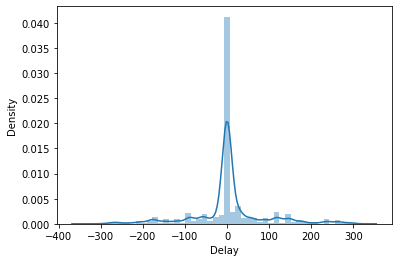

In [ ]:
sns.distplot(y_train)

In [ ]:
X_train.merge(y_train, on = X_train.index)

,key_0,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,invoice_id,Delay
0,4602,140104440,SO corp,2019-01-14,2018-12-30,2018-12-30,2019-01-09,CAD,222893.88,2.960521e+09,5
1,37952,200769623,WAL-MAR co,2019-10-01,2018-12-30,2018-12-30,2019-01-14,USD,29096.48,1.928543e+09,260
2,14849,200769623,WAL-MAR foundation,2019-09-01,2018-12-30,2018-12-29,2019-01-14,USD,11143.09,1.928537e+09,230
3,21725,200726979,BJ'S,2019-01-15,2018-12-30,2018-12-29,2019-01-14,USD,156.12,1.928541e+09,1
4,47634,200769623,WAL-MAR corporation,2019-11-01,2018-12-30,2018-12-30,2019-01-14,USD,41899.59,1.928543e+09,291
...,...,...,...,...,...,...,...,...,...,...,...
27396,42769,200803720,DEC corporation,2019-09-16,2019-10-09,2019-09-10,2019-09-24,USD,60.12,1.929857e+09,-8
27397,27225,200418007,AM foundation,2019-09-25,2019-10-09,2019-09-05,2019-09-25,USD,679.43,1.929830e+09,0
27398,23778,200722444,PERFOR corporation,2019-01-10,2019-10-09,2019-09-09,2019-09-25,USD,88347.18,1.929854e+09,-258
27399,39727,200020431,DEC llc,2019-10-09,2019-10-09,2019-09-10,2019-09-11,USD,4735.34,1.929857e+09,28


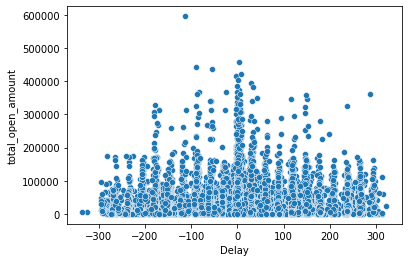

In [ ]:
sns.scatterplot(data = X_train.merge(y_train, on = X_train.index), x = 'Delay', y = 'total_open_amount')

In [ ]:
#Feature Engineering
df.columns

Index(['cust_number', 'name_customer', 'clear_date', 'posting_date',
       'document_create_date', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'invoice_id', 'isOpen'],
      dtype='object')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27401 entries, 4602 to 23754
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           27401 non-null  object        
 1   name_customer         27401 non-null  object        
 2   clear_date            27401 non-null  datetime64[ns]
 3   posting_date          27401 non-null  datetime64[ns]
 4   document_create_date  27401 non-null  datetime64[ns]
 5   due_in_date           27401 non-null  datetime64[ns]
 6   invoice_currency      27401 non-null  object        
 7   total_open_amount     27401 non-null  float64       
 8   invoice_id            27401 non-null  float64       
dtypes: datetime64[ns](4), float64(2), object(3)
memory usage: 2.1+ MB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
Currency_enc = LabelEncoder()
Currency_enc.fit(X_train['invoice_currency'])
X_train['Invoice_Currency'] = Currency_enc.transform(X_train['invoice_currency'])

In [ ]:
X_train[['invoice_currency', 'Invoice_Currency']]

,invoice_currency,Invoice_Currency
4602,CAD,0
37952,USD,1
14849,USD,1
21725,USD,1
47634,USD,1
...,...,...
42769,USD,1
27225,USD,1
23778,USD,1
39727,USD,1


In [ ]:
X_val['Invoice_Currency'] = Currency_enc.transform(X_val['invoice_currency'])
X_test['Invoice_Currency'] = Currency_enc.transform(X_test['invoice_currency'])

In [ ]:
X_val

,cust_number,name_customer,clear_date,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,invoice_id,Invoice_Currency
785,200704858,WAKE llc,2019-09-25,2019-10-09,2019-09-09,2019-09-25,USD,11382.31,1.929850e+09,1
15696,200726979,BJ'S trust,2019-09-26,2019-10-09,2019-09-08,2019-09-25,USD,98269.26,1.929848e+09,1
34951,200769623,WAL-MAR corporation,2019-09-20,2019-10-09,2019-09-10,2019-09-25,USD,37187.50,1.929856e+09,1
42919,200759878,SA corporation,2019-09-27,2019-10-09,2019-09-11,2019-09-25,USD,40561.53,1.929861e+09,1
26271,200769623,WAL-MAR corporation,2019-09-20,2019-10-09,2019-09-10,2019-09-25,USD,70509.90,1.929857e+09,1
...,...,...,...,...,...,...,...,...,...,...
46024,200704045,RA in,2019-09-27,2019-12-09,2019-09-13,2019-09-27,USD,45713.68,1.929872e+09,1
11912,200782669,SYGMA corp,2019-09-30,2019-12-09,2019-09-11,2019-09-27,USD,6754.96,1.929863e+09,1
14900,200794332,COST us,2019-09-26,2019-12-09,2019-09-11,2019-09-27,USD,15284.38,1.929866e+09,1
32516,200895843,US systems,2019-04-10,2019-12-09,2019-09-12,2019-09-27,USD,14391.23,1.929868e+09,1


In [ ]:
X_train.drop(['invoice_currency'], axis = 1, inplace = True)
X_val.drop(['invoice_currency'], axis = 1, inplace = True)
X_test.drop(['invoice_currency'], axis = 1, inplace = True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27401 entries, 4602 to 23754
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           27401 non-null  object        
 1   name_customer         27401 non-null  object        
 2   clear_date            27401 non-null  datetime64[ns]
 3   posting_date          27401 non-null  datetime64[ns]
 4   document_create_date  27401 non-null  datetime64[ns]
 5   due_in_date           27401 non-null  datetime64[ns]
 6   total_open_amount     27401 non-null  float64       
 7   invoice_id            27401 non-null  float64       
 8   Invoice_Currency      27401 non-null  int64         
dtypes: datetime64[ns](4), float64(2), int64(1), object(2)
memory usage: 2.1+ MB


In [ ]:
X_val.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 785 to 29490
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           5872 non-null   object        
 1   name_customer         5872 non-null   object        
 2   clear_date            5872 non-null   datetime64[ns]
 3   posting_date          5872 non-null   datetime64[ns]
 4   document_create_date  5872 non-null   datetime64[ns]
 5   due_in_date           5872 non-null   datetime64[ns]
 6   total_open_amount     5872 non-null   float64       
 7   invoice_id            5872 non-null   float64       
 8   Invoice_Currency      5872 non-null   int64         
dtypes: datetime64[ns](4), float64(2), int64(1), object(2)
memory usage: 458.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 24971 to 39638
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
-

In [ ]:
def drop_columns(col, traindf = X_train, valdf = X_val, testdf = X_test):
  traindf.drop(col, axis = 1, inplace = True)
  valdf.drop(col, axis = 1, inplace = True)
  testdf.drop(col, axis = 1, inplace = True)
  return traindf, valdf, testdf

In [ ]:
#X_train['Clear_Day_Of_The_Week'] = X_train['clear_date'].dt.weekday
#X_val['Clear_Day_Of_The_Week'] = X_val['clear_date'].dt.weekday
#X_test['Clear_Day_Of_The_Week'] = X_test['clear_date'].dt.weekday

X_train['Clear_Day'] = X_train['clear_date'].dt.day
X_val['Clear_Day'] = X_val['clear_date'].dt.day
X_test['Clear_Day'] = X_test['clear_date'].dt.day

X_train['Clear_Month'] = X_train['clear_date'].dt.month
X_val['Clear_Month'] = X_val['clear_date'].dt.month
X_test['Clear_Month'] = X_test['clear_date'].dt.month

X_train['Clear_Year'] = X_train['clear_date'].dt.year
X_val['Clear_Year'] = X_val['clear_date'].dt.year
X_test['Clear_Year'] = X_test['clear_date'].dt.year

In [ ]:
X_train, X_val, X_test = drop_columns(['clear_date'])

In [ ]:
X_val

,cust_number,name_customer,posting_date,document_create_date,due_in_date,total_open_amount,invoice_id,Invoice_Currency,Clear_Day,Clear_Month,Clear_Year
785,200704858,WAKE llc,2019-10-09,2019-09-09,2019-09-25,11382.31,1.929850e+09,1,25,9,2019
15696,200726979,BJ'S trust,2019-10-09,2019-09-08,2019-09-25,98269.26,1.929848e+09,1,26,9,2019
34951,200769623,WAL-MAR corporation,2019-10-09,2019-09-10,2019-09-25,37187.50,1.929856e+09,1,20,9,2019
42919,200759878,SA corporation,2019-10-09,2019-09-11,2019-09-25,40561.53,1.929861e+09,1,27,9,2019
26271,200769623,WAL-MAR corporation,2019-10-09,2019-09-10,2019-09-25,70509.90,1.929857e+09,1,20,9,2019
...,...,...,...,...,...,...,...,...,...,...,...
46024,200704045,RA in,2019-12-09,2019-09-13,2019-09-27,45713.68,1.929872e+09,1,27,9,2019
11912,200782669,SYGMA corp,2019-12-09,2019-09-11,2019-09-27,6754.96,1.929863e+09,1,30,9,2019
14900,200794332,COST us,2019-12-09,2019-09-11,2019-09-27,15284.38,1.929866e+09,1,26,9,2019
32516,200895843,US systems,2019-12-09,2019-09-12,2019-09-27,14391.23,1.929868e+09,1,10,4,2019


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27401 entries, 4602 to 23754
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           27401 non-null  object        
 1   name_customer         27401 non-null  object        
 2   posting_date          27401 non-null  datetime64[ns]
 3   document_create_date  27401 non-null  datetime64[ns]
 4   due_in_date           27401 non-null  datetime64[ns]
 5   total_open_amount     27401 non-null  float64       
 6   invoice_id            27401 non-null  float64       
 7   Invoice_Currency      27401 non-null  int64         
 8   Clear_Day             27401 non-null  int64         
 9   Clear_Month           27401 non-null  int64         
 10  Clear_Year            27401 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(4), object(2)
memory usage: 2.5+ MB


In [ ]:
X_train['Posting_Day'] = X_train['posting_date'].dt.day
X_val['Posting_Day'] = X_val['posting_date'].dt.day
X_test['Posting_Day'] = X_test['posting_date'].dt.day

X_train['Posting_Month'] = X_train['posting_date'].dt.month
X_val['Posting_Month'] = X_val['posting_date'].dt.month
X_test['Posting_Month'] = X_test['posting_date'].dt.month

X_train['Posting_Year'] = X_train['posting_date'].dt.year
X_val['Posting_Year'] = X_val['posting_date'].dt.year
X_test['Posting_Year'] = X_test['posting_date'].dt.year

In [ ]:
X_train, X_val, X_test = drop_columns(['posting_date'])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27401 entries, 4602 to 23754
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           27401 non-null  object        
 1   name_customer         27401 non-null  object        
 2   document_create_date  27401 non-null  datetime64[ns]
 3   due_in_date           27401 non-null  datetime64[ns]
 4   total_open_amount     27401 non-null  float64       
 5   invoice_id            27401 non-null  float64       
 6   Invoice_Currency      27401 non-null  int64         
 7   Clear_Day             27401 non-null  int64         
 8   Clear_Month           27401 non-null  int64         
 9   Clear_Year            27401 non-null  int64         
 10  Posting_Day           27401 non-null  int64         
 11  Posting_Month         27401 non-null  int64         
 12  Posting_Year          27401 non-null  int64         
dtypes: datetime64

In [ ]:
X_train['Document_Day'] = X_train['document_create_date'].dt.day
X_val['Document_Day'] = X_val['document_create_date'].dt.day
X_test['Document_Day'] = X_test['document_create_date'].dt.day

X_train['Document_Month'] = X_train['document_create_date'].dt.month
X_val['Document_Month'] = X_val['document_create_date'].dt.month
X_test['Document_Month'] = X_test['document_create_date'].dt.month

X_train['Document_Year'] = X_train['document_create_date'].dt.year
X_val['Document_Year'] = X_val['document_create_date'].dt.year
X_test['Document_Year'] = X_test['document_create_date'].dt.year

In [ ]:
X_train, X_val, X_test = drop_columns(['document_create_date'])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27401 entries, 4602 to 23754
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cust_number        27401 non-null  object        
 1   name_customer      27401 non-null  object        
 2   due_in_date        27401 non-null  datetime64[ns]
 3   total_open_amount  27401 non-null  float64       
 4   invoice_id         27401 non-null  float64       
 5   Invoice_Currency   27401 non-null  int64         
 6   Clear_Day          27401 non-null  int64         
 7   Clear_Month        27401 non-null  int64         
 8   Clear_Year         27401 non-null  int64         
 9   Posting_Day        27401 non-null  int64         
 10  Posting_Month      27401 non-null  int64         
 11  Posting_Year       27401 non-null  int64         
 12  Document_Day       27401 non-null  int64         
 13  Document_Month     27401 non-null  int64         
 14  Doc

In [ ]:
X_train['due_in_Day'] = X_train['due_in_date'].dt.day
X_val['due_in_Day'] = X_val['due_in_date'].dt.day
X_test['due_in_Day'] = X_test['due_in_date'].dt.day

X_train['due_in_Month'] = X_train['due_in_date'].dt.month
X_val['due_in_Month'] = X_val['due_in_date'].dt.month
X_test['due_in_Month'] = X_test['due_in_date'].dt.month

X_train['due_in_Year'] = X_train['due_in_date'].dt.year
X_val['due_in_Year'] = X_val['due_in_date'].dt.year
X_test['due_in_Year'] = X_test['due_in_date'].dt.year

In [ ]:
X_train, X_val, X_test = drop_columns(['due_in_date'])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27401 entries, 4602 to 23754
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_number        27401 non-null  object 
 1   name_customer      27401 non-null  object 
 2   total_open_amount  27401 non-null  float64
 3   invoice_id         27401 non-null  float64
 4   Invoice_Currency   27401 non-null  int64  
 5   Clear_Day          27401 non-null  int64  
 6   Clear_Month        27401 non-null  int64  
 7   Clear_Year         27401 non-null  int64  
 8   Posting_Day        27401 non-null  int64  
 9   Posting_Month      27401 non-null  int64  
 10  Posting_Year       27401 non-null  int64  
 11  Document_Day       27401 non-null  int64  
 12  Document_Month     27401 non-null  int64  
 13  Document_Year      27401 non-null  int64  
 14  due_in_Day         27401 non-null  int64  
 15  due_in_Month       27401 non-null  int64  
 16  due_in_Year        

In [ ]:
X_train['cust_number']

4602     140104440
37952    200769623
14849    200769623
21725    200726979
47634    200769623
           ...    
42769    200803720
27225    200418007
23778    200722444
39727    200020431
23754    200772670
Name: cust_number, Length: 27401, dtype: object